In [1]:
import torch
import matplotlib.pyplot as plt
import cv2
import pandas as pd

In [2]:
# Load the trained model 
model = torch.load('/models/run10/weights.pt')
# Set the model to evaluate mode
model.eval()

Unet(
  (encoder): MobileNetV2Encoder(
    (features): Sequential(
      (0): ConvBNReLU(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): InvertedResidual(
        (conv): Sequential(
          (0): ConvBNReLU(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(inplace=True)
          )
          (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): InvertedResidual(
        (conv): Sequential(
          (0): ConvBNReLU(
            (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=Fals

In [3]:
# Read the log file using pandas into a dataframe
df = pd.read_csv('/models/run09/log.csv')

### Training and testing loss, f1_score, auroc and IoU values for the model

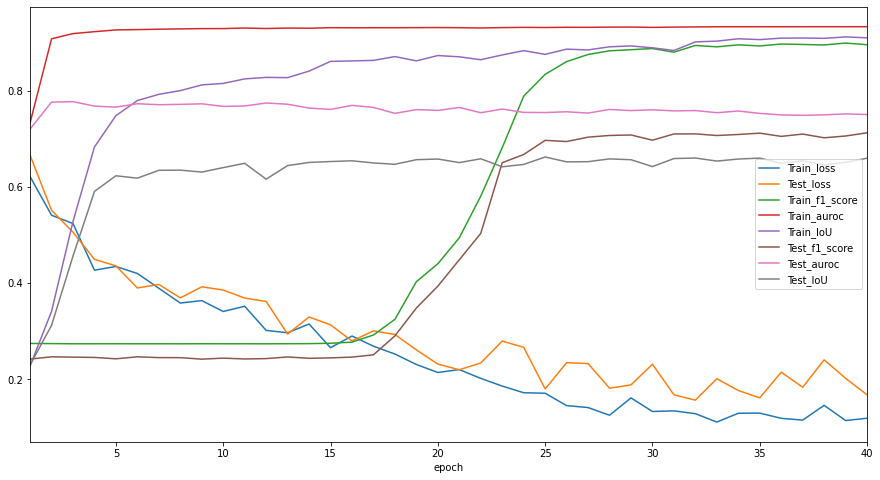

In [4]:
# Plot all the values with respect to the epochs
df.plot(x='epoch',figsize=(15,8));

In [5]:
print(df[['Train_auroc','Test_auroc']].max())

Train_auroc    0.932700
Test_auroc     0.776907
dtype: float64


### Sample Prediction

In [6]:
ino = 378
# Read  a sample image and mask from the data-set
img = cv2.imread(f'/models/train_data/Images/{ino:03d}.jpg').transpose(2,0,1).reshape(1,3,320,640)
mask = cv2.imread(f'/models/train_data/Masks/{ino:03d}_mask.png')
with torch.no_grad():
    a = model(torch.from_numpy(img).type(torch.cuda.FloatTensor)/255)

(array([1.76873e+05, 2.18000e+02, 1.19000e+02, 1.03000e+02, 9.20000e+01,
        9.10000e+01, 1.04000e+02, 1.19000e+02, 1.80000e+02, 2.69010e+04]),
 array([9.1970962e-04, 1.0082520e-01, 2.0073070e-01, 3.0063617e-01,
        4.0054166e-01, 5.0044715e-01, 6.0035264e-01, 7.0025814e-01,
        8.0016363e-01, 9.0006912e-01, 9.9997461e-01], dtype=float32),
 <BarContainer object of 10 artists>)

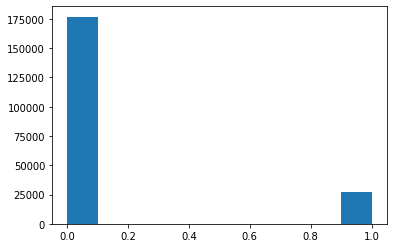

In [7]:
# Plot histogram of the prediction to find a suitable threshold. From the histogram a 0.1 looks like a good choice.
plt.hist(a.data.cpu().numpy().flatten())

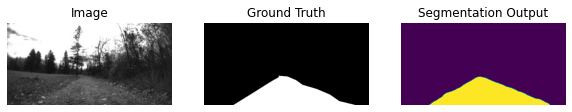

In [8]:
# Plot the input image, ground truth and the predicted output
plt.figure(figsize=(10,10));
plt.subplot(131);
plt.imshow(img[0,...].transpose(1,2,0));
plt.title('Image')
plt.axis('off');
plt.subplot(132);
plt.imshow(mask);
plt.title('Ground Truth')
plt.axis('off');
plt.subplot(133);
plt.imshow(a.cpu().detach().numpy()[0][0]>0.4);
plt.title('Segmentation Output')
plt.axis('off');
# plt.savefig('./SegmentationOutput.png',bbox_inches='tight')